In [1]:
%pip install torch torchvision flask pillow


   ---------------------------------------- 0/3 [werkzeug]
   ---------------------------------------- 0/3 [werkzeug]
   ---------------------------------------- 0/3 [werkzeug]
   ---------------------------------------- 0/3 [werkzeug]
   ---------------------------------------- 0/3 [werkzeug]
   ---------------------------------------- 0/3 [werkzeug]
   ---------------------------------------- 0/3 [werkzeug]
   ---------------------------------------- 0/3 [werkzeug]
   ---------------------------------------- 0/3 [werkzeug]
   ---------------------------------------- 0/3 [werkzeug]
   ------------- -------------------------- 1/3 [itsdangerous]
   ------------- -------------------------- 1/3 [itsdangerous]
   -------------------------- ------------- 2/3 [flask]
   -------------------------- ------------- 2/3 [flask]
   -------------------------- ------------- 2/3 [flask]
   -------------------------- ------------- 2/3 [flask]
   -------------------------- ------------- 2/3 [flask]
   

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_ds, val_ds = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=128, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [3]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [4]:
train_acc_hist, val_acc_hist = [], []

for epoch in range(3):  # keep 3 for fast; increase to 5 if you want
    model.train()
    correct, total = 0, 0
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        out = model(x)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()

        preds = out.argmax(1)
        correct += (preds == y).sum().item()
        total += y.size(0)

    train_acc = correct / total
    train_acc_hist.append(train_acc)

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for x, y in val_loader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            preds = out.argmax(1)
            correct += (preds == y).sum().item()
            total += y.size(0)

    val_acc = correct / total
    val_acc_hist.append(val_acc)

    print(f"Epoch {epoch+1}: Train Acc={train_acc:.4f}, Val Acc={val_acc:.4f}")

Epoch 1: Train Acc=0.9076, Val Acc=0.9778
Epoch 2: Train Acc=0.9760, Val Acc=0.9852
Epoch 3: Train Acc=0.9818, Val Acc=0.9856


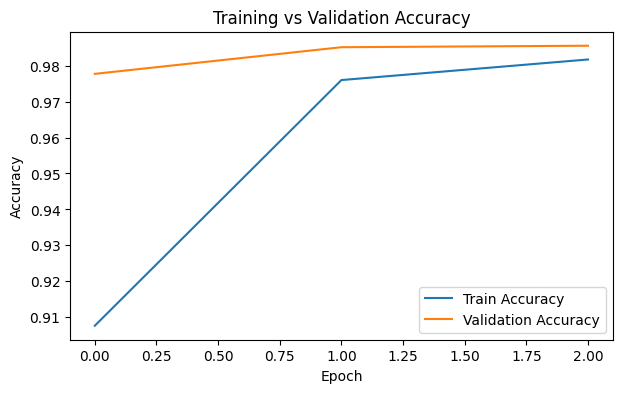

In [5]:
plt.figure(figsize=(7,4))
plt.plot(train_acc_hist, label="Train Accuracy")
plt.plot(val_acc_hist, label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [6]:
torch.save(model.state_dict(), "mnist_cnn.pth")
print("Saved model: mnist_cnn.pth")

Saved model: mnist_cnn.pth


In [7]:
cd C:\Users\Lenovo\Desktop\Task_5_Deploy
python app.py

SyntaxError: invalid syntax (858082586.py, line 1)

In [10]:
cd C:\Users\Lenovo\Desktop\Task_5
python app.py

SyntaxError: invalid syntax (3704179368.py, line 1)

In [11]:
%cd C:\Users\Lenovo\Desktop\Task_5_Deploy

[WinError 2] The system cannot find the file specified: 'C:\\Users\\Lenovo\\Desktop\\Task_5_Deploy'
C:\Users\Lenovo\Desktop\Task_5


In [12]:
!python app.py

C:\Users\Lenovo\AppData\Local\Python\pythoncore-3.14-64\python.exe: can't open file 'C:\\Users\\Lenovo\\Desktop\\Task_5\\app.py': [Errno 2] No such file or directory


In [13]:
%cd C:\Users\Lenovo\Desktop\Task_5_Deploy

[WinError 2] The system cannot find the file specified: 'C:\\Users\\Lenovo\\Desktop\\Task_5_Deploy'
C:\Users\Lenovo\Desktop\Task_5


In [14]:
import os
os.getcwd(), os.listdir()

('C:\\Users\\Lenovo\\Desktop\\Task_5',
 ['.ipynb_checkpoints',
  'data',
  'Image Classification Project OUTPUTS',
  'Image Classification Project.ipynb',
  'Image_Preprocessing OUTPUTS',
  'Image_Preprocessing.ipynb',
  'mnist_cnn.pth',
  'Untitled.ipynb'])

In [15]:
import os

os.makedirs("Task_5_Deploy", exist_ok=True)
os.listdir()

['.ipynb_checkpoints',
 'data',
 'Image Classification Project OUTPUTS',
 'Image Classification Project.ipynb',
 'Image_Preprocessing OUTPUTS',
 'Image_Preprocessing.ipynb',
 'mnist_cnn.pth',
 'Task_5_Deploy',
 'Untitled.ipynb']

In [16]:
%cd Task_5_Deploy

C:\Users\Lenovo\Desktop\Task_5\Task_5_Deploy


In [17]:
import os
os.listdir()

[]

In [18]:
import shutil
shutil.copy(r"..\mnist_cnn.pth", r".\mnist_cnn.pth")

'.\\mnist_cnn.pth'

In [19]:
os.listdir()

['mnist_cnn.pth']

In [20]:
app_code = r'''
from flask import Flask, request, render_template_string
from PIL import Image
import io
import torch
import torch.nn as nn
import torchvision.transforms as transforms

class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
model.load_state_dict(torch.load("mnist_cnn.pth", map_location=device))
model.eval()

transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

app = Flask(__name__)

HTML = """
<!doctype html>
<title>MNIST Image Classifier</title>
<h2>MNIST Digit Classifier (Upload an image)</h2>
<form method=post enctype=multipart/form-data>
  <input type=file name=file accept="image/*">
  <input type=submit value="Predict">
</form>

{% if pred is not none %}
  <hr>
  <h3>Prediction: {{ pred }}</h3>
  <p>Confidence: {{ conf }}</p>
{% endif %}
"""

@app.route("/", methods=["GET", "POST"])
def home():
    pred = None
    conf = None

    if request.method == "POST":
        if "file" not in request.files:
            return render_template_string(HTML, pred=None, conf=None)

        f = request.files["file"]
        if f.filename == "":
            return render_template_string(HTML, pred=None, conf=None)

        img_bytes = f.read()
        img = Image.open(io.BytesIO(img_bytes)).convert("RGB")

        x = transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            logits = model(x)
            probs = torch.softmax(logits, dim=1)
            p, y = torch.max(probs, dim=1)

        pred = int(y.item())
        conf = f"{float(p.item()):.3f}"

    return render_template_string(HTML, pred=pred, conf=conf)

if __name__ == "__main__":
    app.run(host="127.0.0.1", port=5000, debug=True)
'''
with open("app.py", "w", encoding="utf-8") as f:
    f.write(app_code)

print("Created app.py")

Created app.py


In [21]:
import os
os.listdir()

['app.py', 'mnist_cnn.pth']

In [ ]:
!python app.py